# Exploratory Data Analysis
- импорт библиотек
- чтение данных
- describe()
- визуализации EDA
- ящики с усами
- временные ряды

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# чтение данных
test_group = pd.read_csv('test_group.csv', sep=';')
control_group = pd.read_csv('control_group.csv', sep=';')
print(control_group.head())
print(test_group.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [10]:
# переименование колонок для удобства
test_group.rename(columns={'# of Impressions': 'Impressions of ad', '# of Website Clicks': 'Website Clicks', '# of Searches': 'Searches', '# of View Content': 'Viewed content', '# of Add to Cart': 'Added to Cart', '# of Purchase': 'Purchases'}, inplace=True)
control_group.rename(columns={'# of Impressions': 'Impressions of ad', '# of Website Clicks': 'Website Clicks', '# of Searches': 'Searches', '# of View Content': 'Viewed content', '# of Add to Cart': 'Added to Cart', '# of Purchase': 'Purchases'}, inplace=True)

In [6]:
# первичный осмотр данных, есть пропуски в control_group
print(control_group.info())
print(test_group.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign Name      30 non-null     object 
 1   Date               30 non-null     object 
 2   Spend [USD]        30 non-null     int64  
 3   Impressions of ad  29 non-null     float64
 4   Reach              29 non-null     float64
 5   Website Clicks     29 non-null     float64
 6   Searches           29 non-null     float64
 7   Viewed content     29 non-null     float64
 8   Added to Cart      29 non-null     float64
 9   Purchases          29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Campaign Name      30 non-null     object
 1   Date 

In [7]:
# получаем обзорную статистику numeric колонок
print(control_group.describe())
print(test_group.describe())

       Spend [USD]  Impressions of ad          Reach  Website Clicks  \
count    30.000000          29.000000      29.000000       29.000000   
mean   2288.433333      109559.758621   88844.931034     5320.793103   
std     367.334451       21688.922908   21832.349595     1757.369003   
min    1757.000000       71274.000000   42859.000000     2277.000000   
25%    1945.500000       92029.000000   74192.000000     4085.000000   
50%    2299.500000      113430.000000   91579.000000     5224.000000   
75%    2532.000000      121332.000000  102479.000000     6628.000000   
max    3083.000000      145248.000000  127852.000000     8137.000000   

          Searches  Viewed content  Added to Cart   Purchases  
count    29.000000       29.000000      29.000000   29.000000  
mean   2221.310345     1943.793103    1300.000000  522.793103  
std     866.089368      777.545469     407.457973  185.028642  
min    1001.000000      848.000000     442.000000  222.000000  
25%    1615.000000     1249.000

In [11]:
# так как данные агрегированы по дням, то для каждого дня вычислим CVR, CPA, CTR
control_group['CVR'] = control_group['Purchases'].apply(lambda x: x * 100) / control_group['Impressions of ad']
test_group['CVR'] = test_group['Purchases'].apply(lambda x: x * 100) / test_group['Impressions of ad']
test_group['CPA'] = test_group['Spend [USD]'] / test_group['Purchases']
control_group['CPA'] = control_group['Spend [USD]'] / control_group['Purchases']
test_group['CTR'] = test_group['Website Clicks'] * 100 / test_group['Impressions of ad']
control_group['CTR'] = control_group['Website Clicks'] * 100 / control_group['Impressions of ad']
control_group.head()

,Campaign Name,Date,Spend [USD],Impressions of ad,Reach,Website Clicks,Searches,Viewed content,Added to Cart,Purchases,CVR,CPA,CTR
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.747261,3.689320,8.483471
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.422174,3.438356,6.700264
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.282437,6.298387,4.941121
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.466533,5.705882,4.205659
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Посчитаем средние по вычисленным метрикам для обоих групп
print(f' Control group CVR: {control_group["CVR"].dropna().mean()}')
print(f' Test group CVR: {test_group["CVR"].dropna().mean()}')
print(f' Control group CPA: {control_group["CPA"].dropna().mean()}')
print(f' Test group CPA: {test_group["CPA"].dropna().mean()}')
print(f" Control group CTR: {control_group['CTR'].dropna().mean()}")
print(f" Test group CTR: {test_group['CTR'].dropna().mean()}")

 Control group CVR: 0.5000838685705586
 Test group CVR: 0.8425206515806644
 Control group CPA: 5.052338662510723
 Test group CPA: 5.899589404475941
 Control group CTR: 5.095870900557933
 Test group CTR: 10.242259642726077


## Conversion Rate
Можно заметить, что средний CVR в тестовой группе на 0.34 процента больше
## Cost Per Acquisition
CPA у контрольной группы примерно на 0.84 доллара меньше
## Click-Through Rate
CTR значительно выше у тестовой группы (на 5%)

In [13]:
# Для лучшего анализа построим временной ряд для трат на привлечение
df_for_spend = pd.concat([control_group, test_group], ignore_index=True) # соединим 2 таблицы 
df_for_spend.head()

,Campaign Name,Date,Spend [USD],Impressions of ad,Reach,Website Clicks,Searches,Viewed content,Added to Cart,Purchases,CVR,CPA,CTR
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.747261,3.689320,8.483471
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.422174,3.438356,6.700264
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.282437,6.298387,4.941121
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.466533,5.705882,4.205659
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.]),
 [Text(18109.0, 0, '2019-08-01'),
  Text(18113.0, 0, '2019-08-05'),
  Text(18117.0, 0, '2019-08-09'),
  Text(18121.0, 0, '2019-08-13'),
  Text(18125.0, 0, '2019-08-17'),
  Text(18129.0, 0, '2019-08-21'),
  Text(18133.0, 0, '2019-08-25'),
  Text(18137.0, 0, '2019-08-29')])

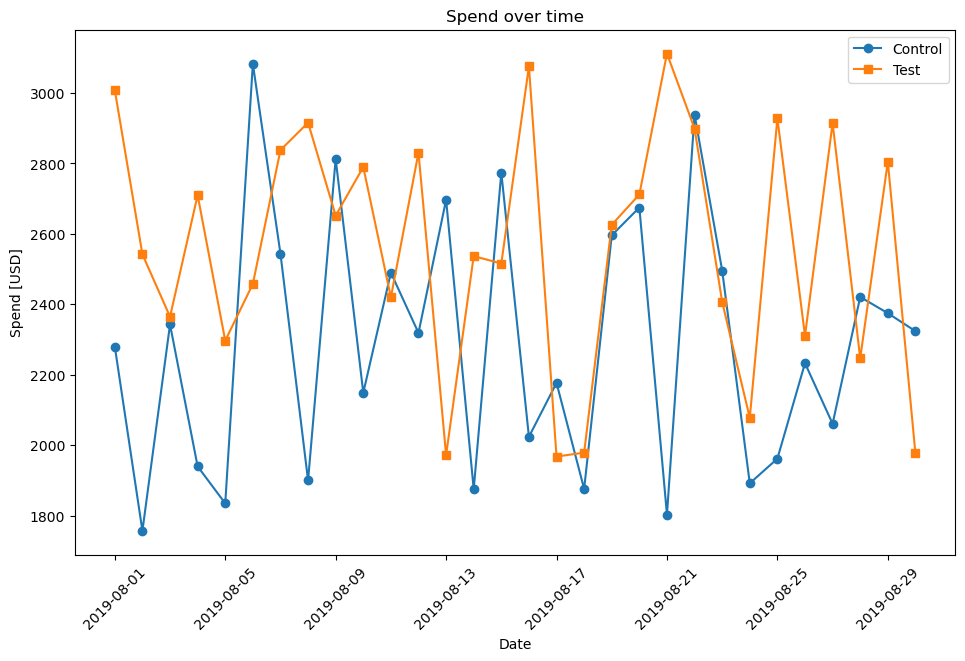

In [18]:
df_for_spend['Date'] = pd.to_datetime(df_for_spend['Date'], format='%d.%m.%Y')
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
control_data = df_for_spend[df_for_spend['Campaign Name'] == 'Control Campaign']
test_data = df_for_spend[df_for_spend['Campaign Name'] == 'Test Campaign']

plt.plot(control_data['Date'], control_data['Spend [USD]'], marker='o', label='Control')
plt.plot(test_data['Date'], test_data['Spend [USD]'], marker='s', label='Test')

plt.title('Spend over time')
plt.xlabel('Date')
plt.ylabel('Spend [USD]')
plt.legend()
plt.xticks(rotation=45)

## Spend
Исходя из графика траты распределены хаотично и какого-то тренда выделить нельзя.
Однако можно заметить, что график тестовой группы визуально располагается чуть выше.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.]),
 [Text(18109.0, 0, '2019-08-01'),
  Text(18113.0, 0, '2019-08-05'),
  Text(18117.0, 0, '2019-08-09'),
  Text(18121.0, 0, '2019-08-13'),
  Text(18125.0, 0, '2019-08-17'),
  Text(18129.0, 0, '2019-08-21'),
  Text(18133.0, 0, '2019-08-25'),
  Text(18137.0, 0, '2019-08-29')])

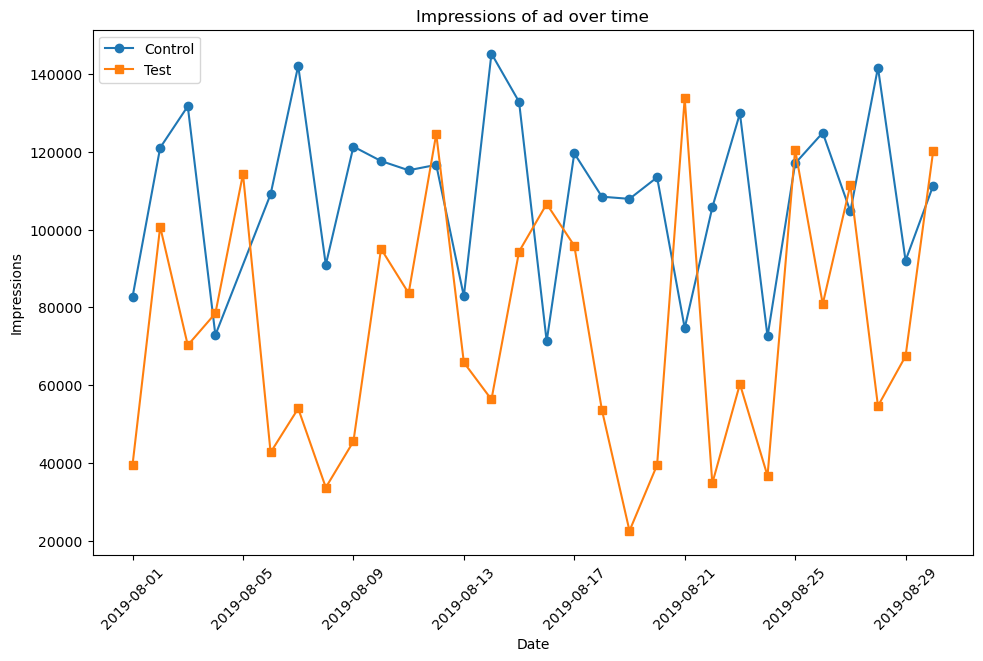

In [22]:
# из-за пропусков в одной строчке данных в control_group убираем ее из датафрейма
subset_without_1_line = control_group.dropna(subset=['Impressions of ad', 'Website Clicks', 'Purchases'])
df = pd.concat([subset_without_1_line, test_group], ignore_index=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
control_inf = df[df['Campaign Name'] == 'Control Campaign']
test_inf = df[df['Campaign Name'] == 'Test Campaign']

plt.plot(control_inf['Date'], control_inf['Impressions of ad'], marker='o', label='Control')
plt.plot(test_inf['Date'], test_inf['Impressions of ad'], marker='s', label='Test')

plt.title('Impressions of ad over time') # теперь анализируем временной ряд для количество показов рекламы
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.legend()
plt.xticks(rotation=45)

## Impressions of ad
Похожая картина что и с тратами, бросается в глаза больший разброс тестовых данных.
Также в большинстве дней количество показанных реклам больше у контрольной группы.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.]),
 [Text(18109.0, 0, '2019-08-01'),
  Text(18113.0, 0, '2019-08-05'),
  Text(18117.0, 0, '2019-08-09'),
  Text(18121.0, 0, '2019-08-13'),
  Text(18125.0, 0, '2019-08-17'),
  Text(18129.0, 0, '2019-08-21'),
  Text(18133.0, 0, '2019-08-25'),
  Text(18137.0, 0, '2019-08-29')])

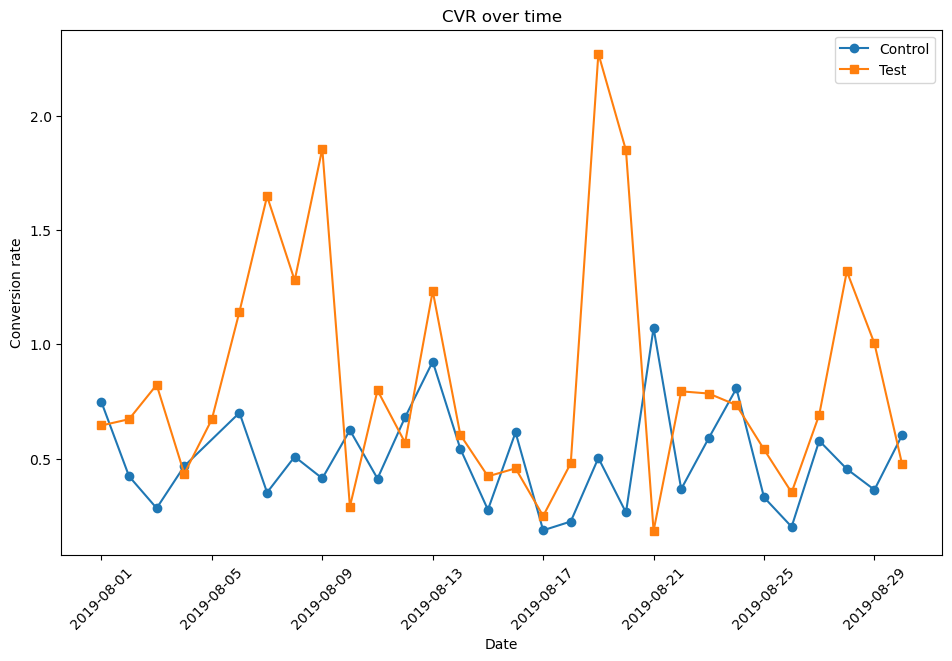

In [21]:
# теперь рассмотрим CVR
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)

plt.plot(control_inf['Date'], control_inf['CVR'], marker='o', label='Control')
plt.plot(test_inf['Date'], test_inf['CVR'], marker='s', label='Test')

plt.title('CVR over time')
plt.xlabel('Date')
plt.ylabel('Conversion rate')
plt.legend()
plt.xticks(rotation=45)

## Conversion Rate
CVR у тестовой группы достаточно хаотичен, видны всплески, которые скорее обусловлены низким количеством показанной рекламы, нежели существенным приростом на дистанции этой метрики по сравнению с контрольной группой.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.]),
 [Text(18109.0, 0, '2019-08-01'),
  Text(18113.0, 0, '2019-08-05'),
  Text(18117.0, 0, '2019-08-09'),
  Text(18121.0, 0, '2019-08-13'),
  Text(18125.0, 0, '2019-08-17'),
  Text(18129.0, 0, '2019-08-21'),
  Text(18133.0, 0, '2019-08-25'),
  Text(18137.0, 0, '2019-08-29')])

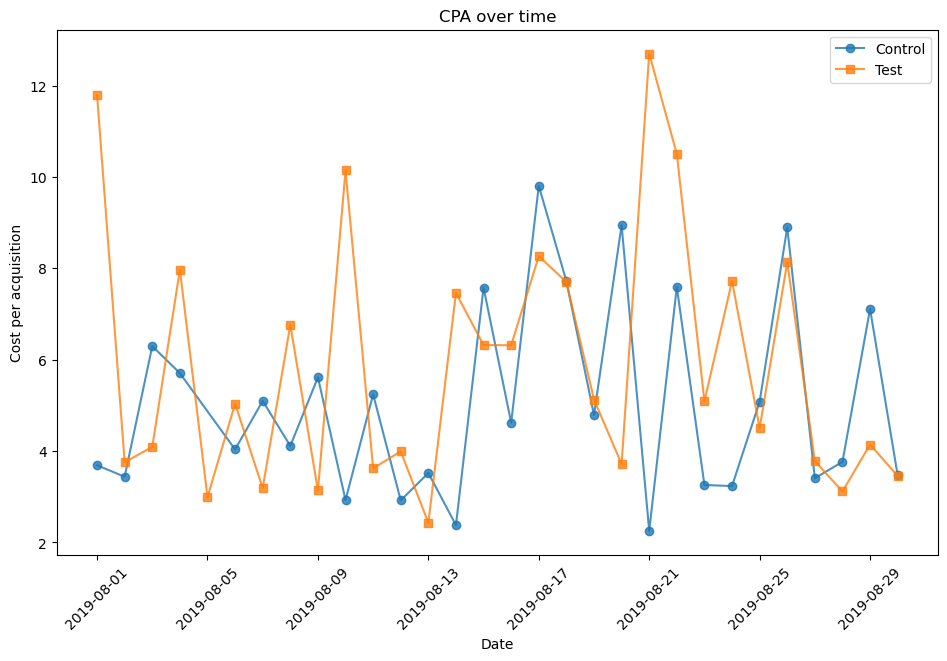

In [23]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)

plt.plot(control_inf['Date'], control_inf['CPA'], marker='o', label='Control', alpha=0.8)
plt.plot(test_inf['Date'], test_inf['CPA'], marker='s', label='Test', alpha=0.8)

plt.title('CPA over time')
plt.xlabel('Date')
plt.ylabel('Cost per acquisition')
plt.legend()
plt.xticks(rotation=45)

## Cost Per Acquisition
С CPR видна похожая с CVR картина. Видны единичные всплески роста стоимости на каждое приобретение у тестовой группы.

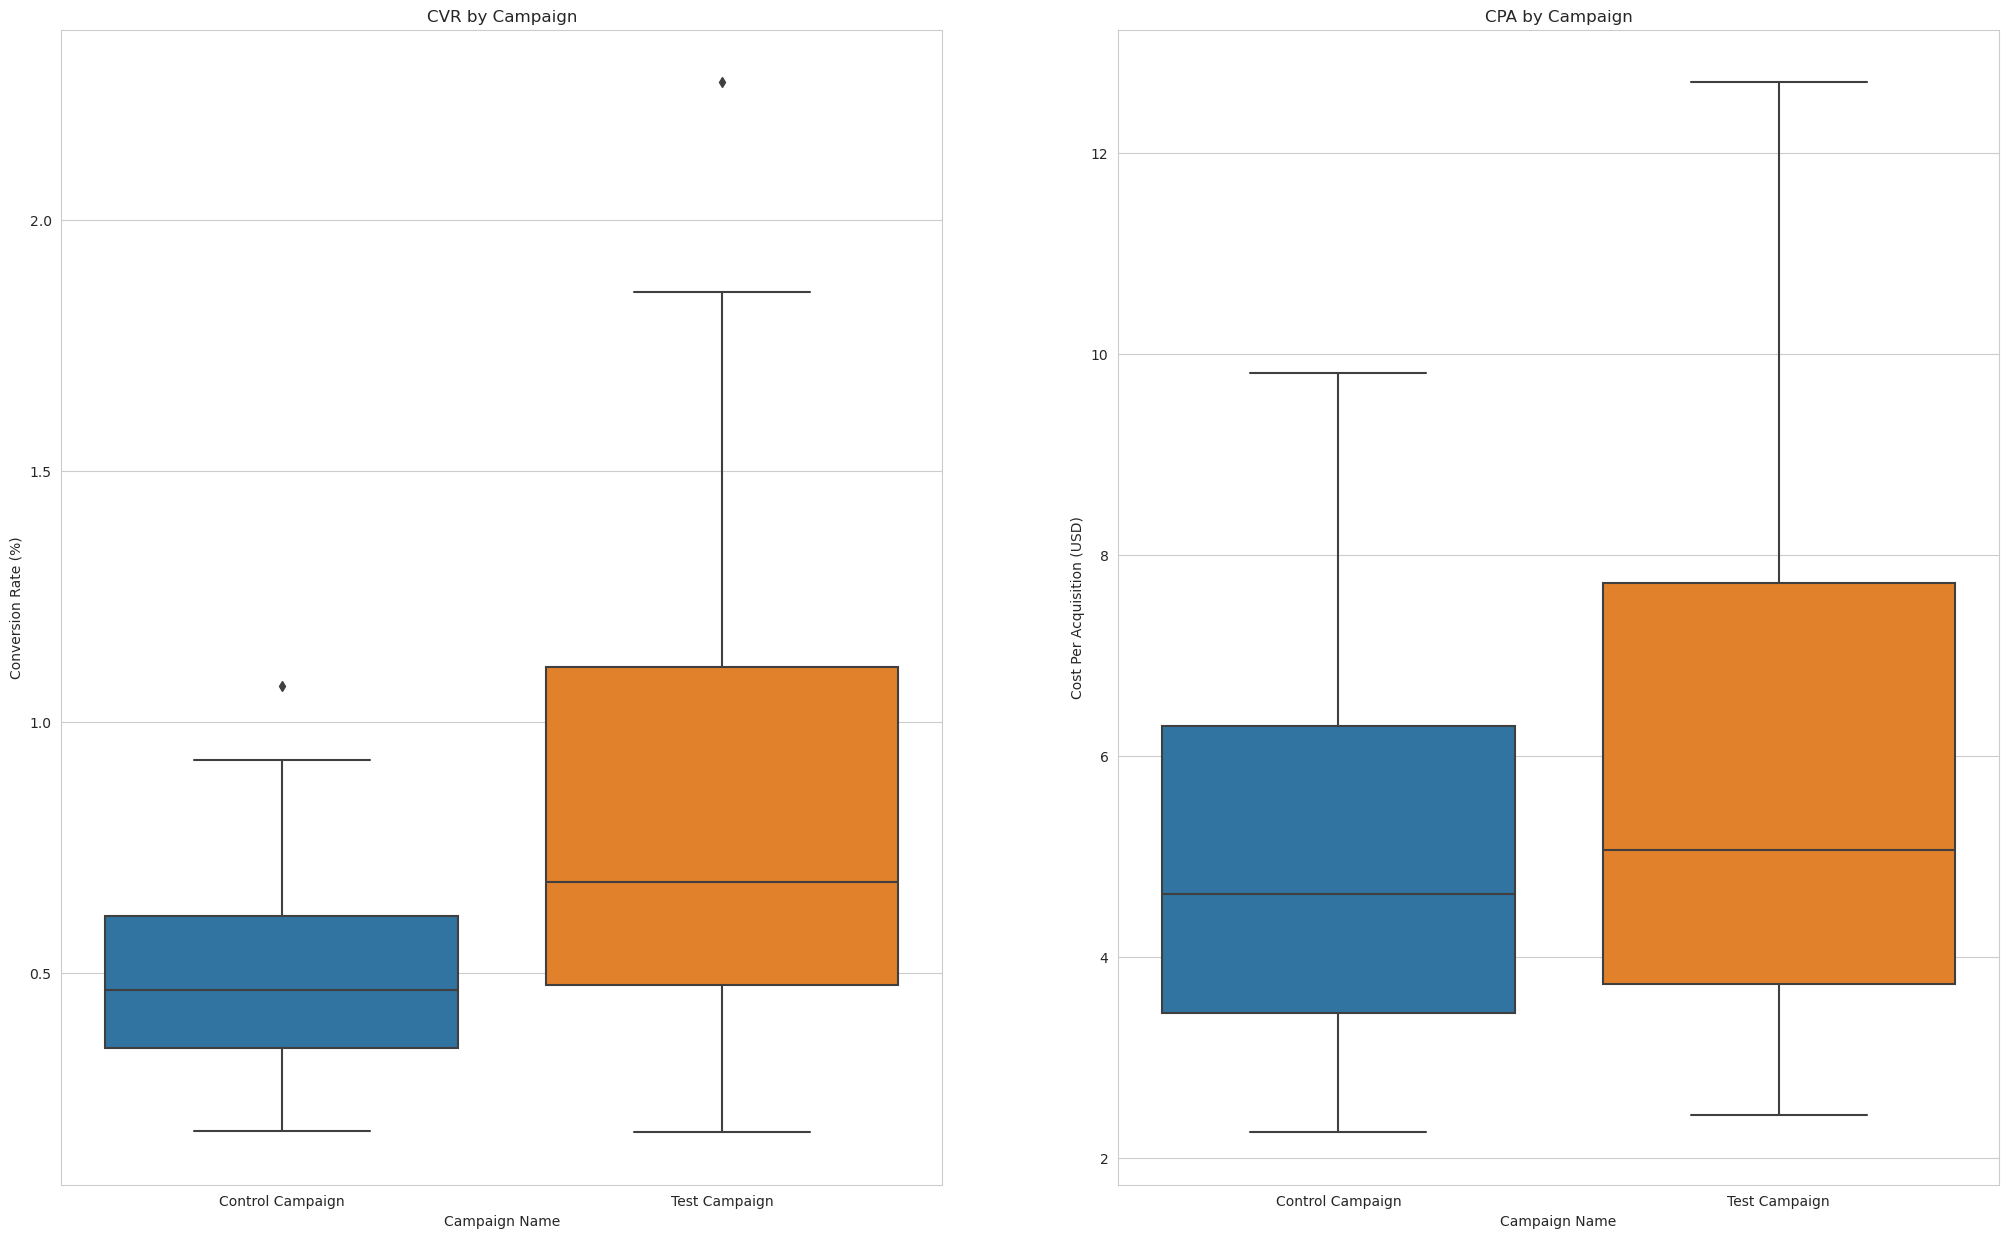

In [26]:
# посмотрим на распределение значений CVR и CPA для обоих выборок с помощью box-plot
sns.set_style('whitegrid')
plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Campaign Name', y='CVR')
plt.title('CVR by Campaign')
plt.ylabel('Conversion Rate (%)')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Campaign Name', y='CPA')
plt.title('CPA by Campaign')
plt.ylabel('Cost Per Acquisition (USD)')
plt.show()

## Box-plots
Исходя из диаграммы можно сказать, что у CVR контрольной группы нормальное распределение, у тестовой же явное смещение вправо с большим разбросом. Для CPA похожая картина.

## Выводы по EDA
Исходя из первичного анализа данных нельзя с точностью сказать, какую стратегию стоит выбрать компании. Потребуется дополнительное исследование в виде А/Б теста.